In [ ]:
#downloads dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

In [1]:
#download validation dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2022-11-28 11:24:13--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.71.48, 142.250.182.16, 142.250.182.48, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.71.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  10.3MB/s    in 1.1s    

2022-11-28 11:24:15 (10.3 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



In [3]:
#necessary imports
import numpy as np
import os
import zipfile
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

2022-11-28 11:27:05.949485: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-28 11:27:06.732547: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-28 11:27:06.891560: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-28 11:27:06.891584: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [2]:
#use context management to extarct zip file for training
file_path = './horse-or-human.zip'
with zipfile.ZipFile(file_path, 'r') as f:
    f.extractall('./horse-or-human')

In [4]:
#for validation
file_path = './validation-horse-or-human.zip'
with zipfile.ZipFile(file_path, 'r') as f:
    f.extractall('./validation-horse-or-human')

In [3]:
#setting the file path for training and validation
train_horse_dir = os.path.join('./horse-or-human/horses')
train_human_dir = os.path.join('./horse-or-human/humans')
vaidation_horse_dir = os.path.join('./validation-horse-or-human/horses')
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

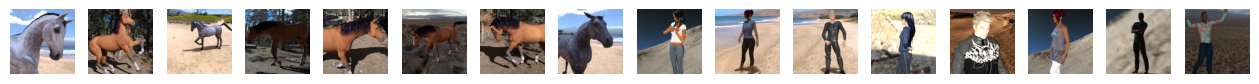

In [4]:
#plotting some pictures
fig = plt.gcf()
fig.set_size_inches(16,16)
next_horse = [os.path.join(train_horse_dir, fname)
              for fname in os.listdir(train_horse_dir)[0:8]]
next_human = [os.path.join(train_human_dir, fname)
              for fname in os.listdir(train_human_dir)[0:8]]
images = next_horse + next_human
for i, img_path in enumerate(images):
    subplot = plt.subplot(16, 16, i + 1)
    subplot.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [5]:
#define the model layers
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

2022-11-27 19:34:19.647175: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-27 19:34:19.648298: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-27 19:34:19.648459: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (MY_SURFACE): /proc/driver/nvidia/version does not exist
2022-11-27 19:34:19.652652: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 33, 33, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 512)               1606144   
          

In [6]:
#define loss optimizers
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
             metrics=['accuracy'])

In [5]:
#data preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
    './horse-or-human/',
    target_size=(300, 300),
    batch_size=128,
    class_mode='binary')

validation_generator = train_datagen.flow_from_directory(
    './validation-horse-or-human/',
    target_size=(300, 300),
    batch_size=128,
    class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
model.fit(train_generator,
          steps_per_epoch=8,
          epochs=20,
          verbose=1,
          validation_data=validation_generator,
          validation_steps=8)

Epoch 1/10


In [ ]:
#predict some images
from tensorflow.keras.utils import load_img, img_to_array

for image in images:
    img = load_img(image, target_size=(300, 300))
    x = img_to_array(img)/255
    x = np.expand_dims(x, axis=0)
    image_stack = np.vstack([x])
    classes = model.predict(image_stack, batch_size=10)
    print(classes[0])
    
    if classes[0]>0.5:
        print(image + " is a human")
    else:
        print(image + " is a horse")